In [12]:
import numpy as np

In [13]:
class FCLayer:

    def __init__(self, input_size, output_size):
        self.input_size=  input_size
        self.output_size= output_size
        
        self.weights= np.random.randn(
            input_size, 
            output_size
            )/np.sqrt(input_size + output_size)
        
        self.bias= np.random.randn(
            1, 
            output_size
            )/np.sqrt(input_size + output_size)

    def forward(self, input):
        
        self.input= input
        self.output= self.input @ self.weights + self.bias

        return self.output

    def backward(self, output_error, learning_rate):

        input_error=   output_error @ self.weights.T
        weights_error= self.input.T @ output_error
        bias_error=    output_error
        
        self.weights -= learning_rate * weights_error
        self.bias    -= learning_rate * bias_error
        
        return input_error

In [14]:
class ActivationLayer:

    def __init__(self, activation, activation_prime):
        self.activation=       activation
        self.activation_prime= activation_prime
    
    def forward(self, input):
        self.input= input
        return self.activation(input)
    
    def backward(self, output_error, learning_rate):
        return output_error * self.activation_prime(self.input)

In [15]:
# bonus
class FlattenLayer:
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def forward(self, input):
        return np.reshape(input, (1, -1))
    
    def backward(self, output_error, learning_rate):
        return np.reshape(output_error, self.input_shape)

In [16]:
# bonus
class SoftmaxLayer:
    def __init__(self, input_size):
        self.input_size = input_size
    
    def forward(self, input):
        self.input = input
        tmp = np.exp(input)
        self.output = tmp / np.sum(tmp)
        return self.output
    
    def backward(self, output_error, learning_rate):
        input_error = np.zeros(output_error.shape)
        out = np.tile(self.output.T, self.input_size)
        return self.output * np.dot(output_error, np.identity(self.input_size) - out)

In [17]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    return np.exp(-x) / (1 + np.exp(-x))**2

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1 - np.tanh(x)**2

def relu(x):
    return np.maximum(x, 0)

def relu_prime(x):
    return np.array(x >= 0).astype('int')

In [18]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_pred.size

def sse(y_true, y_pred):
    return 0.5 * np.sum(np.power(y_true - y_pred, 2))

def sse_prime(y_true, y_pred):
    return y_pred - y_true

In [19]:
from keras.datasets import mnist
from keras.utils import np_utils

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')
x_train /= 255
y_train = np_utils.to_categorical(y_train)
x_train = x_train[0:1000]
y_train = y_train[0:1000]

x_test = x_test.astype('float32')
x_test /= 255
y_test = np_utils.to_categorical(y_test)

In [20]:
# unlike the Medium article, I am not encapsulating this process in a separate class
# I think it is nice just like this
network = [
    FlattenLayer(input_shape=(28, 28)),
    FCLayer(28 * 28, 128),
    ActivationLayer(relu, relu_prime),
    FCLayer(128, 10),
    SoftmaxLayer(10)
]

epochs = 40
learning_rate = 0.1

# training
for epoch in range(epochs):
    error = 0
    for x, y_true in zip(x_train, y_train):
        # forward
        output = x
        for layer in network:
            output = layer.forward(output)
        
        # error (display purpose only)
        error += mse(y_true, output)

        # backward
        output_error = mse_prime(y_true, output)
        for layer in reversed(network):
            output_error = layer.backward(output_error, learning_rate)
    
    error /= len(x_train)
    print('%d/%d, error=%f' % (epoch + 1, epochs, error))

1/40, error=0.072265
2/40, error=0.036236
3/40, error=0.023191
4/40, error=0.017774
5/40, error=0.014405
6/40, error=0.012011
7/40, error=0.010107
8/40, error=0.008591
9/40, error=0.007337
10/40, error=0.006294
11/40, error=0.005526
12/40, error=0.004912
13/40, error=0.004411
14/40, error=0.003997
15/40, error=0.003650
16/40, error=0.003341
17/40, error=0.003079
18/40, error=0.002873
19/40, error=0.002706
20/40, error=0.002567
21/40, error=0.002454
22/40, error=0.002358
23/40, error=0.002273
24/40, error=0.002196
25/40, error=0.002115
26/40, error=0.002033
27/40, error=0.001962
28/40, error=0.001891
29/40, error=0.001811
30/40, error=0.001735
31/40, error=0.001686
32/40, error=0.001651
33/40, error=0.001623
34/40, error=0.001596
35/40, error=0.001569
36/40, error=0.001539
37/40, error=0.001500
38/40, error=0.001466
39/40, error=0.001443
40/40, error=0.001427


In [21]:
def predict(network, input):
    output = input
    for layer in network:
        output = layer.forward(output)
    return output

ratio = sum([np.argmax(y) == np.argmax(predict(network, x)) for x, y in zip(x_test, y_test)]) / len(x_test)
error = sum([mse(y, predict(network, x)) for x, y in zip(x_test, y_test)]) / len(x_test)
print('ratio: %.2f' % ratio)
print('mse: %.4f' % error)

ratio: 0.87
mse: 0.0192


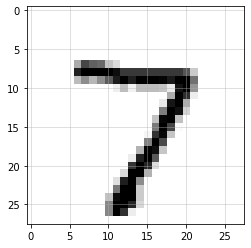

pred: 7, prob: 1.00, true: 7


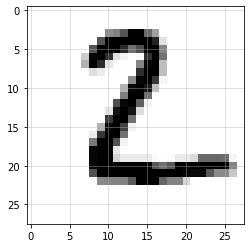

pred: 6, prob: 0.78, true: 2


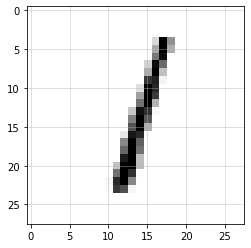

pred: 1, prob: 0.99, true: 1


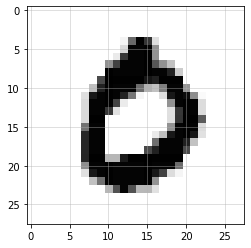

pred: 0, prob: 1.00, true: 0


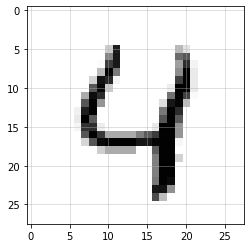

pred: 4, prob: 0.96, true: 4


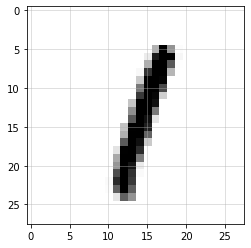

pred: 1, prob: 0.98, true: 1


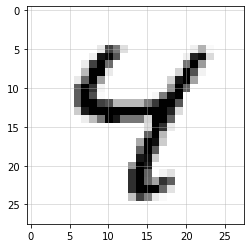

pred: 4, prob: 0.99, true: 4


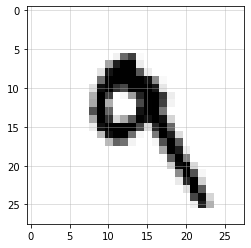

pred: 9, prob: 0.99, true: 9


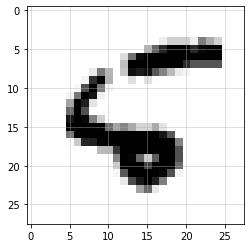

pred: 2, prob: 0.95, true: 5


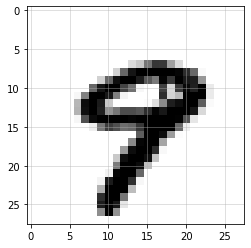

pred: 9, prob: 0.78, true: 9


In [22]:
import matplotlib.pyplot as plt

samples = 10
for test, true in zip(x_test[:samples], y_test[:samples]):
    image = np.reshape(test, (28, 28))
    plt.imshow(image, cmap='binary')
    plt.show()
    pred = predict(network, test)[0]
    idx = np.argmax(pred)
    idx_true = np.argmax(true)
    print('pred: %s, prob: %.2f, true: %d' % (idx, pred[idx], idx_true))